# DATA CLEANING PART 1

In [90]:
#TASK 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go

In [91]:
df=pd.read_csv('/content/sample_data/customerexpress.csv')

In [ ]:
df.head()
#last_review ,reviews_per_month consist of null values

##HANDLING DUPLICATE VALUES

In [ ]:
df1=df.drop_duplicates()
df1 #HANDLING DUPLICATE VALUES
#the dataset does not consist of any duplicates

In [ ]:
# checking if there is any space in front of the words
df['name'].str.strip("...")
df['neighbourhood'].str.strip("/")
#there is no space nor any associative is located with the words in the columns.

## HANDLING NULL VALUES

In [ ]:
df.isnull().sum() #summing up all the null values and elimination the values

In [96]:
missing_values=['N/A','na',np.nan]
# assuming the various ways in which they are wrriten

In [97]:
df1=pd.read_csv('/content/sample_data/customerexpress.csv',na_values=missing_values)

In [99]:
df1.isnull().sum()
df2=df1.isnull().any()#boolean output true if there is any null values

## VISUALIZATION OF NULL VALUES¶

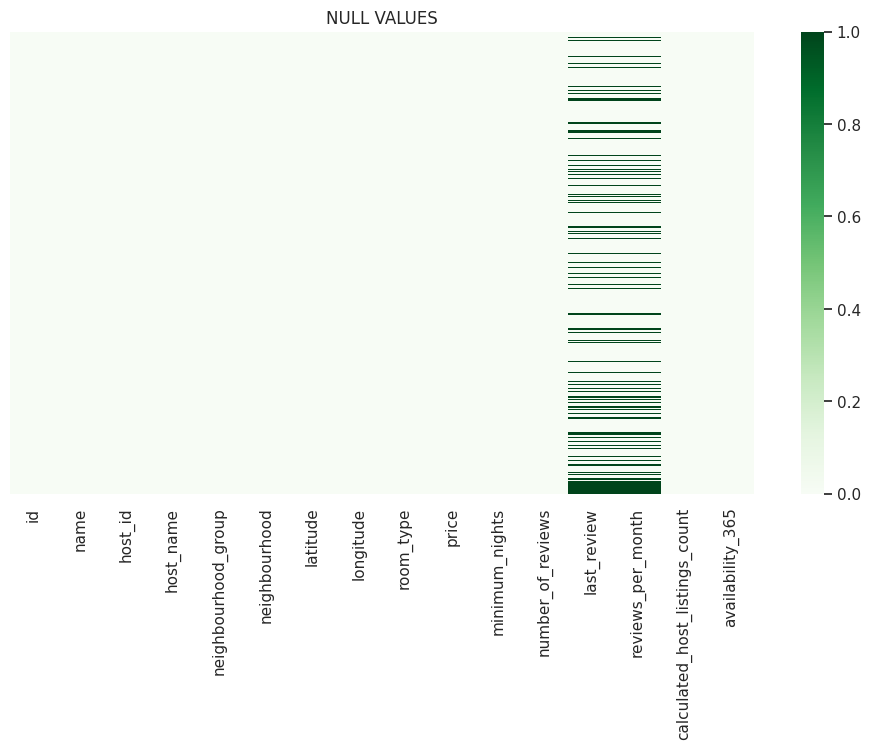

In [100]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.isnull(),yticklabels=False,cmap='Greens')
plt.title("NULL VALUES")
plt.show()# visualization helps us to identify the null values

##REMOVING NULL VALUES

In [ ]:
df1

In [ ]:
df1.dropna(how='all')
#all the null values are detected

In [ ]:
df1.fillna(0)
#replacing the null values with zero

In [ ]:
df1.fillna(method='bfill')

In [ ]:
df1_dropping=df1.fillna(method='bfill')
df1_dropping

In [ ]:
#we add anything inplace of the null values
df.fillna({
    'last_review':0000,
    'reviews_per_month':0000
})# another method of replacing the null values

##STANDARDIZATION

<ipython-input-123-64c9a2c0c00c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

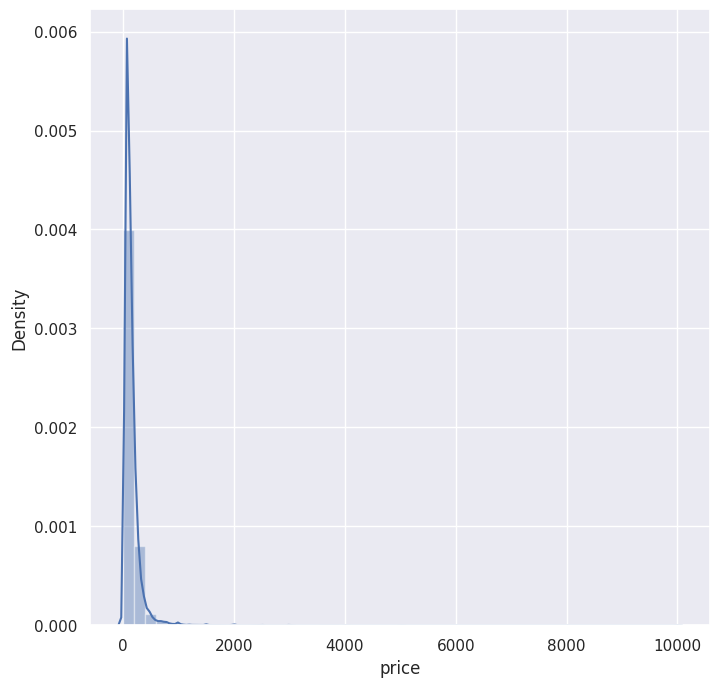

In [123]:
#scaled_data=value-mean/std
#orginal_value=scaled_value*std+mean
sns.distplot(df['price'])

<ipython-input-124-29e5095ad374>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaleddata['reviews_per_month'])


<Axes: xlabel='reviews_per_month', ylabel='Density'>

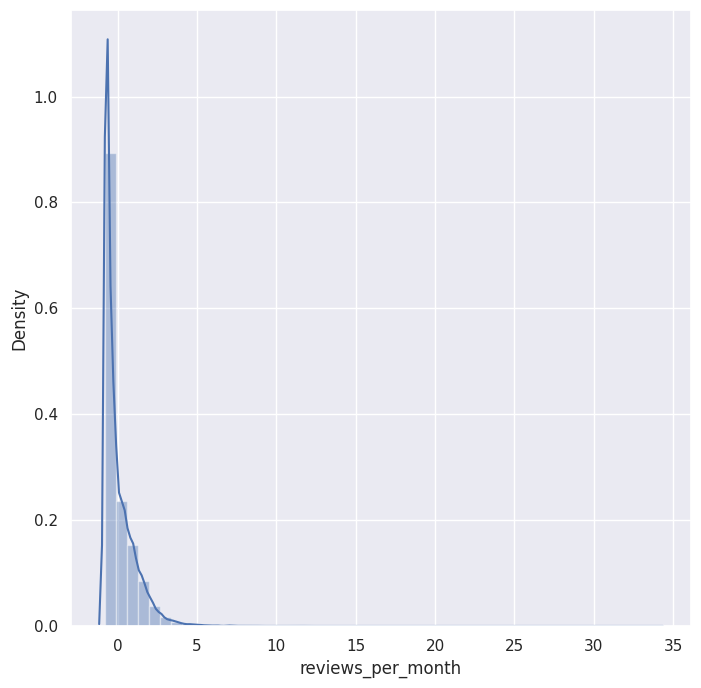

In [124]:
#applying formula
scaleddata=df.copy()
for col in ['price','reviews_per_month']:
  scaleddata[col]=(scaleddata[col]-scaleddata[col].mean())/scaleddata[col].std()
sns.distplot(scaleddata['reviews_per_month'])
# here the vlaue is 0.85

<ipython-input-109-a4c566528127>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaleddata['price'])


<Axes: xlabel='price', ylabel='Density'>

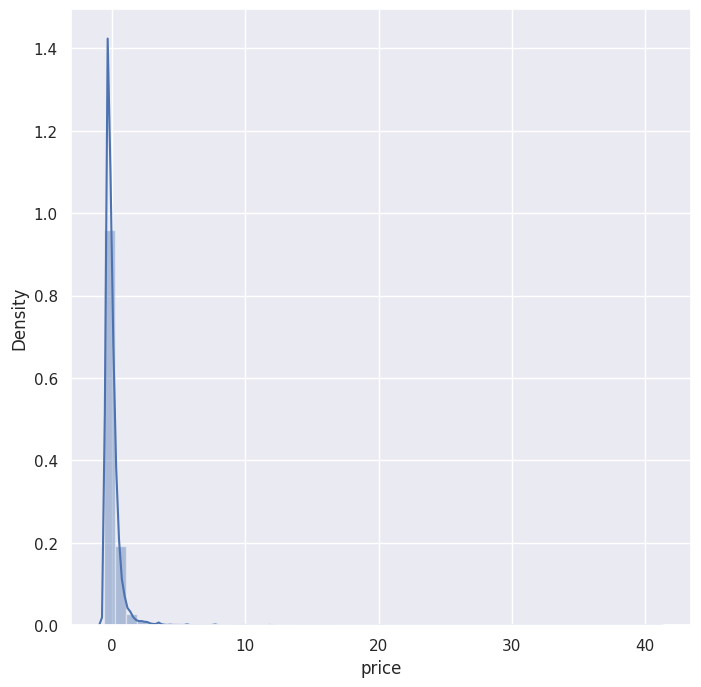

In [109]:
sns.distplot(scaleddata['price'])
# the distribution of both the columns is different

<ipython-input-110-ac60e210906f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clf_data)


<Axes: ylabel='Density'>

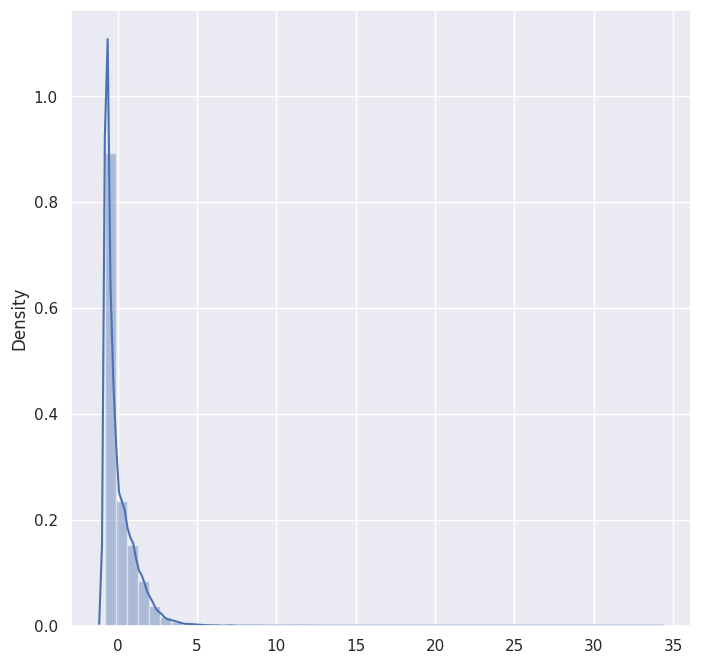

In [110]:
from sklearn.preprocessing import StandardScaler
clf=StandardScaler()
clf.fit(df[['reviews_per_month']])
clf_data=clf.transform(df[['reviews_per_month']])
clf_data=clf_data.reshape(-1)
sns.distplot(clf_data)
#performing standardization

##DETECTING OUTLIERS

In [111]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<ipython-input-112-40bfdd690e1f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'detecting null values')

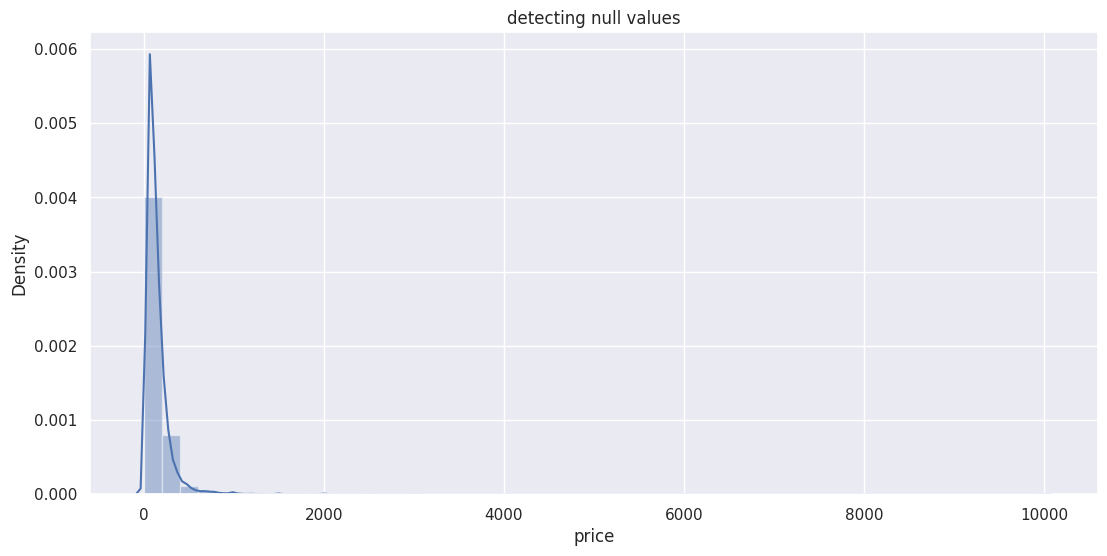

In [112]:
plt.figure(figsize=(13,6))
sns.distplot(df['price'])
plt.title("detecting null values")# there are outliers from 0 to 0.4

<Axes: ylabel='price'>

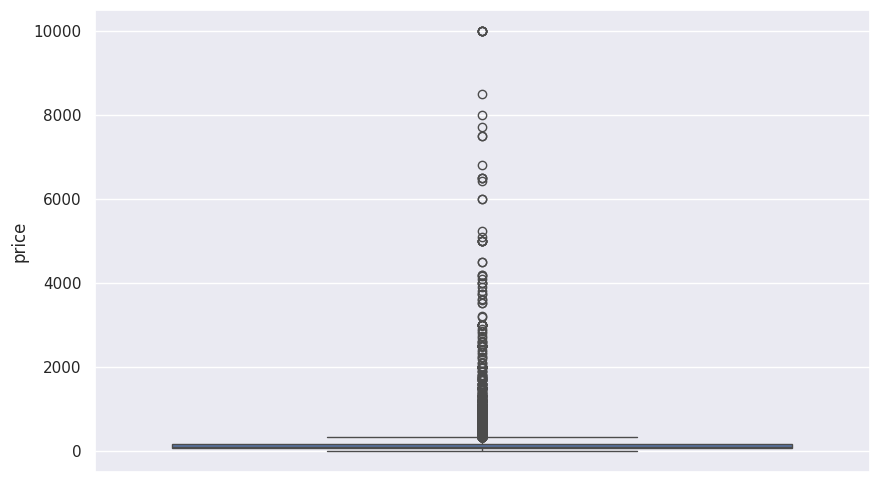

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(df['price'])# outliers from 0 to 0.4
#another waya of visualization

## ZERO SCORE METHOD FOR PRICE

In [114]:
#Z score normalization method is used to normalize using a formual  (x – μ) / σ
#the mean is always 0 and standard deviation is 1
upperlimit=df['price'].mean()+3*df['price'].std()
lowerlimit=df['price'].mean()+3*df['price'].std()
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
#they consist of the same mean value
#finding outliers
df.loc[(df['price'] > upperlimit) | (df['price'] < lowerlimit)]

upperlimit 873.1831964283917
lowerlimit 873.1831964283917


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<Axes: ylabel='reviews_per_month'>

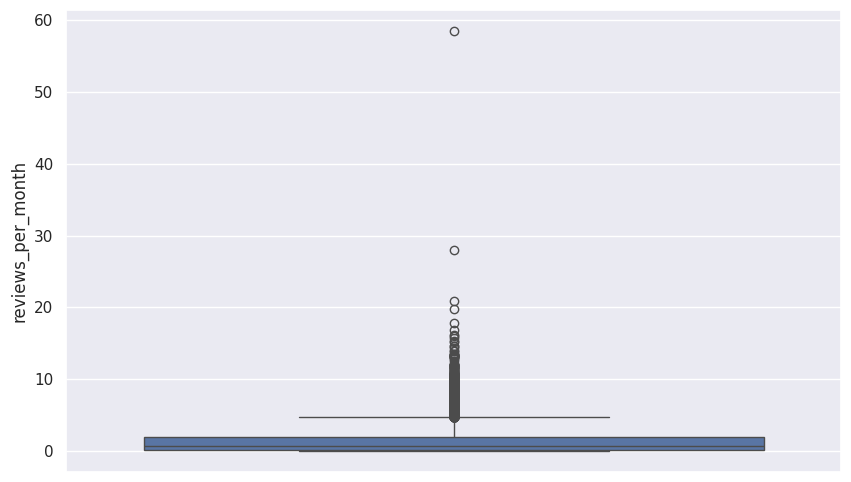

In [115]:
#TO SEE THE DENSITY OF THE OUTLIERS MORE PRECISELY
plt.figure(figsize=(10,6))
sns.boxplot(df['reviews_per_month'])
#there are outliers from 0 to 0.5 and the remaining are the outliers

<ipython-input-116-1b88872963df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month'])#consit of 0.60 as the min value of 50%


Text(0.5, 1.0, 'detecting null values')

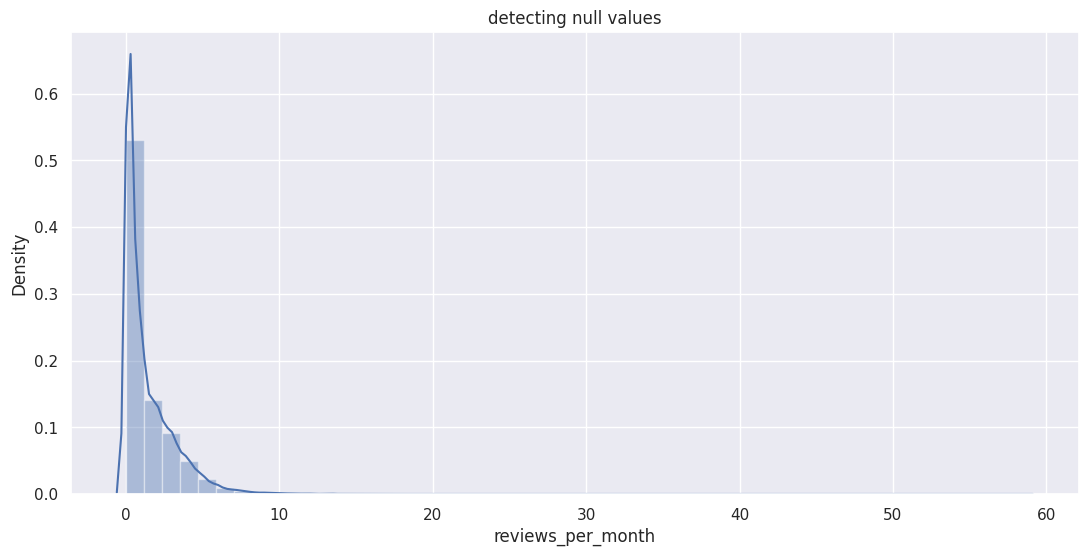

In [116]:
plt.figure(figsize=(13,6))
sns.distplot(df['reviews_per_month'])#consit of 0.60 as the min value of 50%
plt.title("detecting null values")

##ZERO SCORE METHOD FOR REVIEWSPERMONTH



In [117]:
#Z score normalization method is used to normalize using a formual  (x – μ) / σ
#the mean is always 0 and standard deviation is 1
upperlimit=df['reviews_per_month'].mean()+3*df['reviews_per_month'].std()
lowerlimit=df['reviews_per_month'].mean()+3*df['reviews_per_month'].std()
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)
#they consist of the same mean value
#finding outliers
df.loc[(df['reviews_per_month'] > upperlimit) | (df['reviews_per_month'] < lowerlimit)]

upperlimit 6.414547415682079
lowerlimit 6.414547415682079


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,07-07-2019,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,07-07-2019,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,07-07-2019,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,07-07-2019,2.00,1,40


##TRIMMING

In [118]:
# THE COLUMN HAVE SOME OUTLIERS
#DELETING THE OUTLIERS
#instead of or lets switch to and
NEWDOC=df.loc[(df['reviews_per_month'] > upperlimit) & (df['reviews_per_month'] < lowerlimit)]
print('olddata',len(df))# before removing outliers
print('newdata',len(NEWDOC))#after removing outliers
# totaly we have removed 43162 outliers
print('outliers',len(df)-len(NEWDOC))

olddata 48895
newdata 0
outliers 48895


##SKEWNESS ANALYSIS

#NUMERICAL COLUMNS
-it is just another method used for detecting and standardizing the dataset

In [119]:

df.columns
num_col=[]
for col in df.columns:
    if(df[col].dtypes != 'objects'):
        num_col.append(col)
print(num_col)

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [120]:
df.columns
cat_col=[]
for col in df.columns:
    if(df[col].dtypes =='objects'):
        cat_col.append(col)
print(cat_col)

[]


In [121]:
from scipy.stats import skew

id
-0.0902546065215678


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


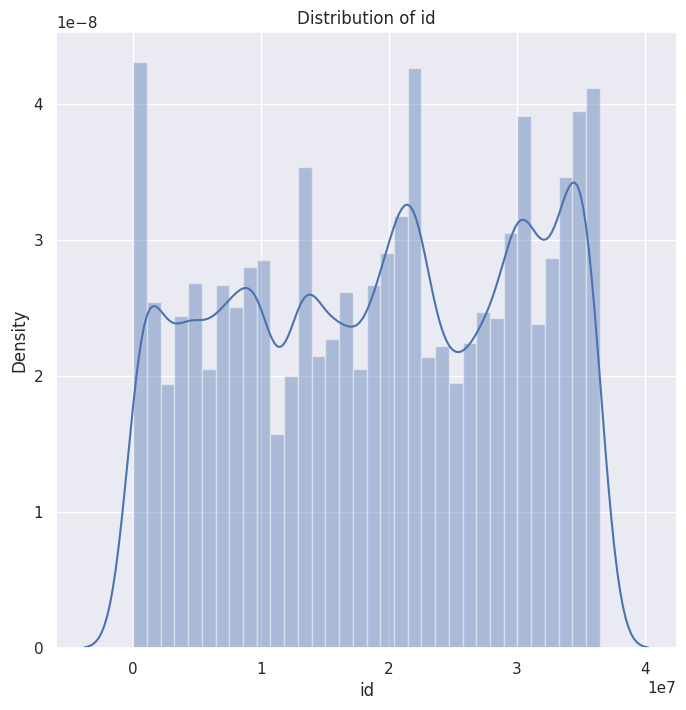

host_id
1.2061769195400978


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


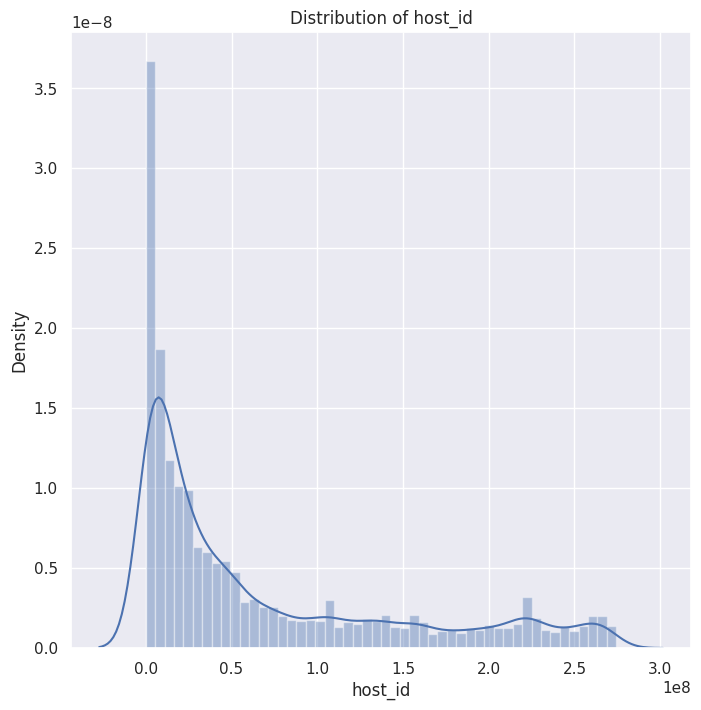

latitude
0.23715928263993216


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


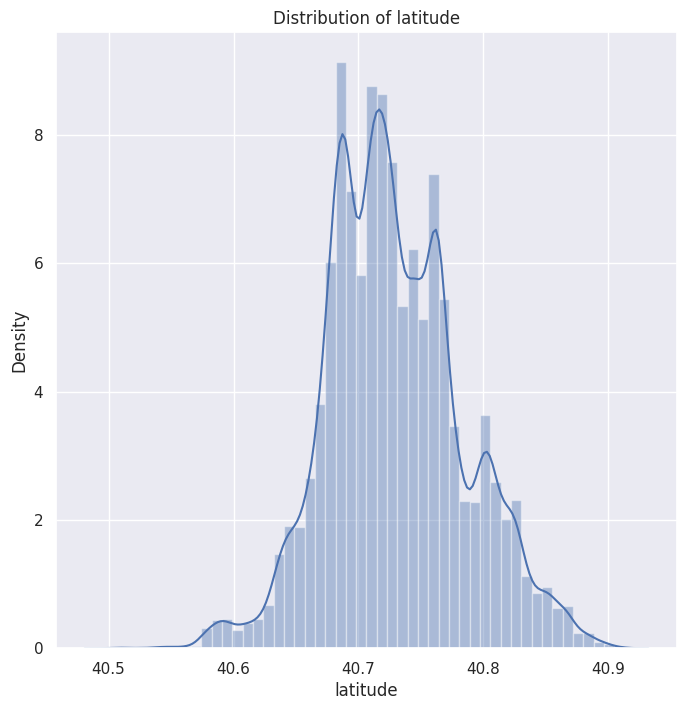

longitude
1.2841708112016754


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


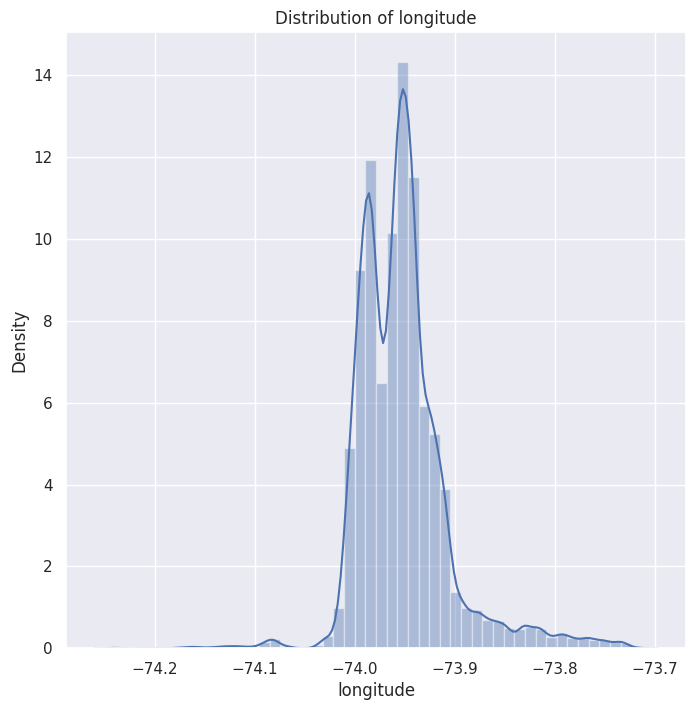

price
19.118352459553982


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


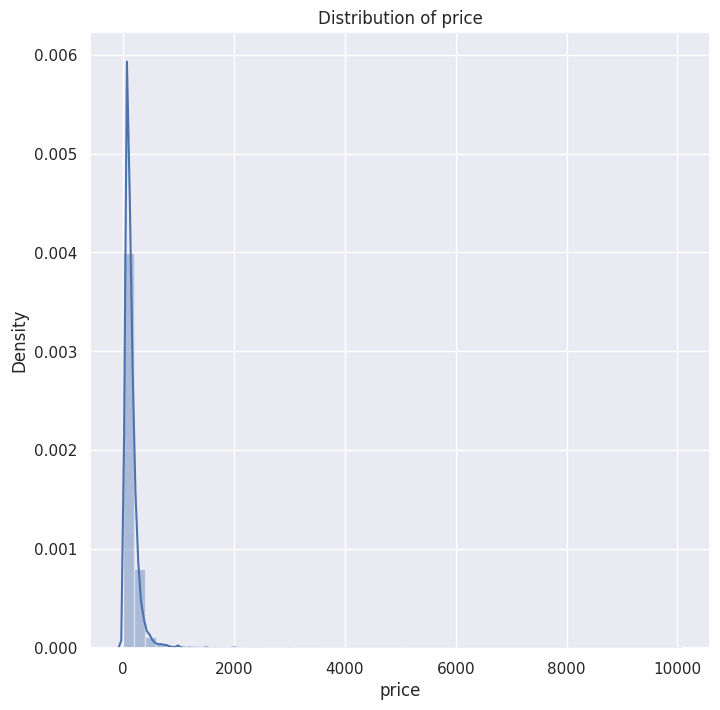

minimum_nights
21.826604907169408


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


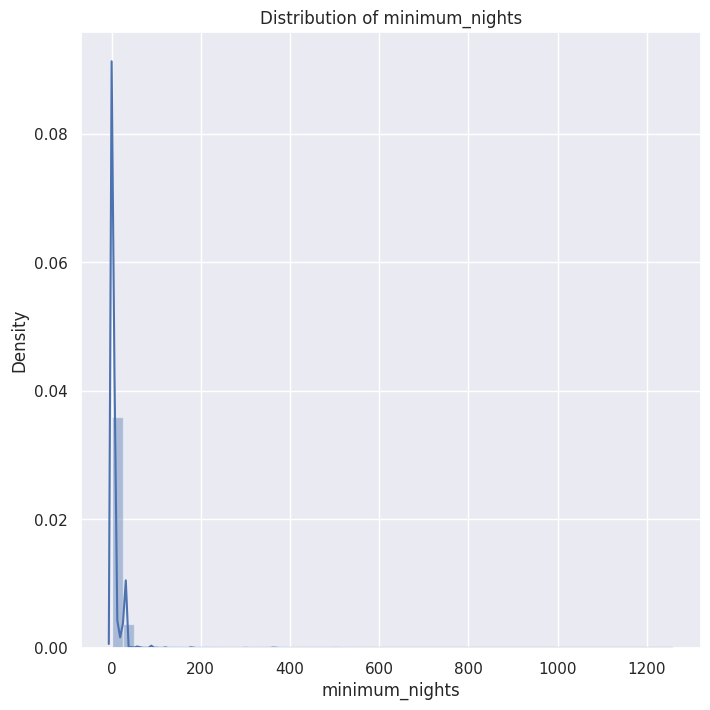

number_of_reviews
3.6905213494042934


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


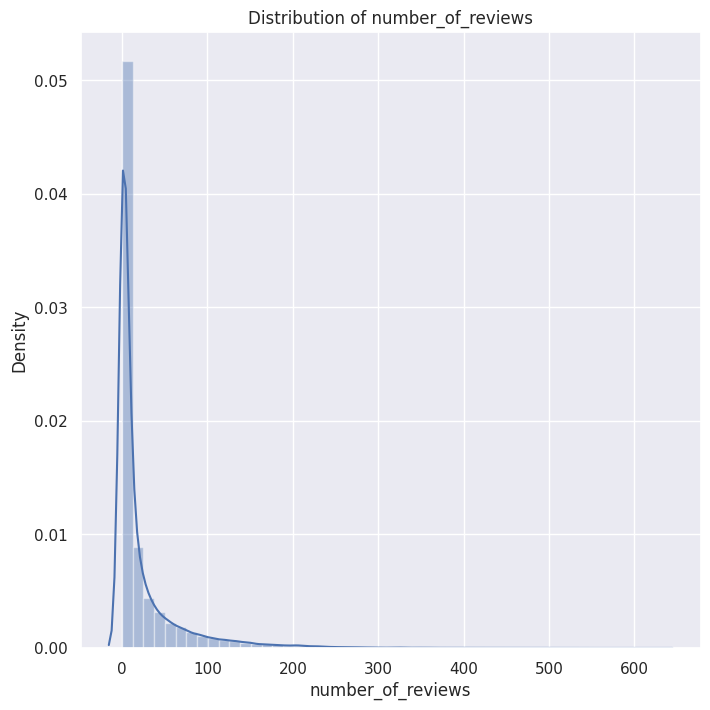

reviews_per_month
nan


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


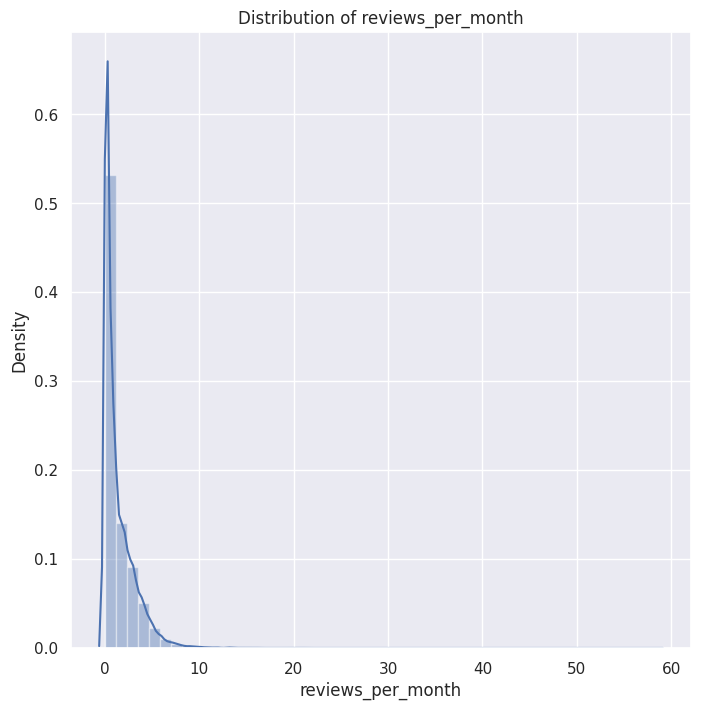

calculated_host_listings_count
7.932930523838819


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


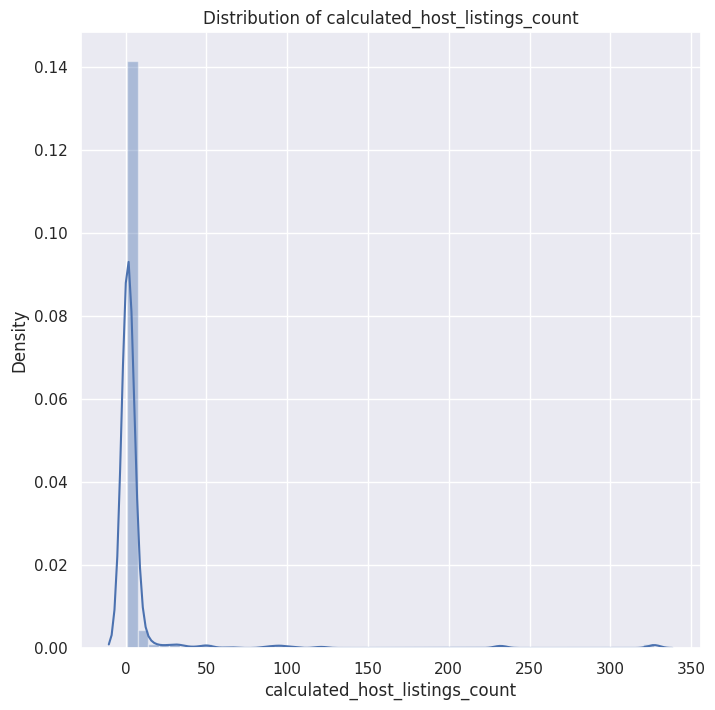

availability_365
0.7633841571088492


<ipython-input-122-9aef58ad32dd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


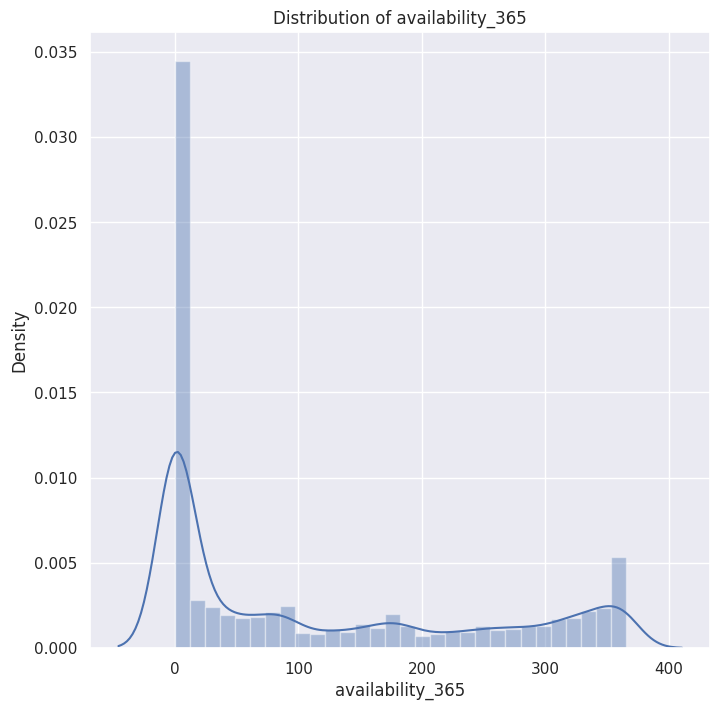

In [122]:
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    print(col)
    print(skew(df[col]))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()